In [1]:
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = sns.load_dataset('glue')


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Model    64 non-null     object 
 1   Year     64 non-null     int64  
 2   Encoder  64 non-null     object 
 3   Task     64 non-null     object 
 4   Score    64 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB


In [4]:
df


,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4


In [5]:
sns.set_style('darkgrid')


<AxesSubplot:ylabel='Score'>

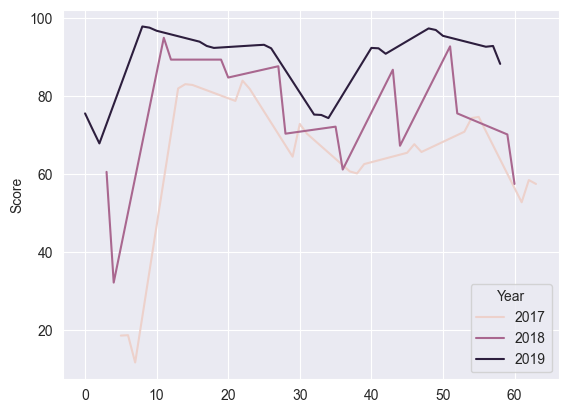

In [6]:
sns.lineplot(x=df.index, y='Score', data=df, hue='Year')


Na wykresie powyżej widzimy, że z roku na rok wyniki się poprawiają.


In [7]:
df[['Model', 'Encoder', 'Task']].describe()


,Model,Encoder,Task
count,64,64,64
unique,8,2,8
top,ERNIE,Transformer,CoLA
freq,8,32,8


Widzimy, że 'Model' ma 8 unikalnych wartości, 'Encoder' tylko 2, a 'Task' również 8.


<AxesSubplot:xlabel='Encoder', ylabel='Score'>

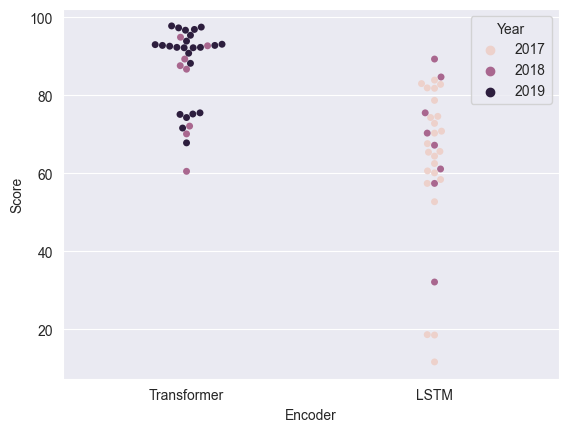

In [8]:
sns.swarmplot(x='Encoder', y='Score', hue='Year', data=df)


Na wykresie powyżej widać, że 'Transformer' był używany w latach 2018-2019, natomiast 'LSTM' w latach 2017-2018. 'LSTM' ma średnią nieco niższą, niż 'Transformer'.


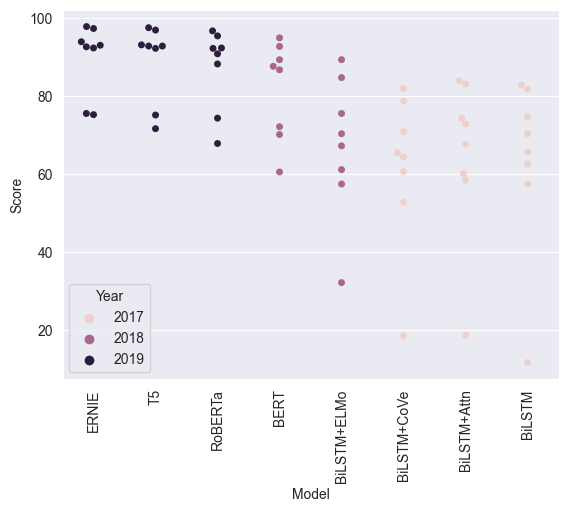

In [9]:
sns.swarmplot(x='Model', y='Score', hue='Year', data=df)
plt.xticks(rotation=90);


Na wykresie widać wyraźnie, że w roku 2017 używano: 'BiLSTM', 'BiLSTM-Attn' oraz 'BiLSTM-CoVe';
w roku 2018: 'BiLSTM+ElMo', 'BERT' oraz 'RoBERTa', a w roku 2019: 'T5' oraz 'ERNIE'.


<AxesSubplot:xlabel='Task', ylabel='Score'>

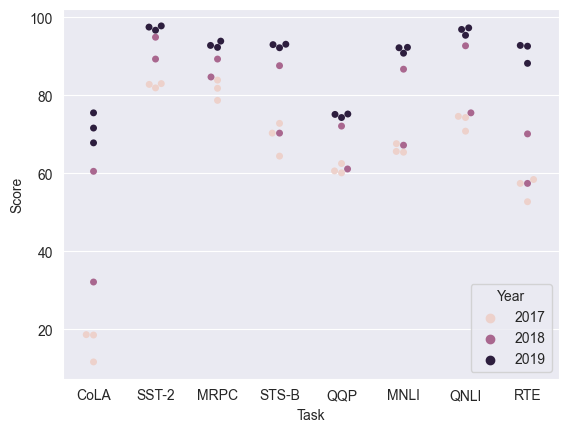

In [10]:
sns.swarmplot(x='Task', y='Score', hue='Year', data=df)


Wykres powyżej wskazuje na to, że wszystkie Task'i były używane w każdym z lat 2017, 2018 i 2019.


In [12]:
df.groupby('Model')['Score'].agg(['mean', 'median', 'std'])


,mean,median,std
Model,,,
BERT,81.7375,87.15,12.472591
BiLSTM,63.3250,67.95,22.718196
BiLSTM+Attn,64.8375,70.20,20.892988
BiLSTM+CoVe,61.6250,64.90,19.817867
BiLSTM+ELMo,67.2000,68.75,17.882234
ERNIE,89.7000,92.80,9.094425
RoBERTa,87.2125,91.50,10.455544
T5,89.0000,92.80,9.903535


Ze wszystkich modeli najwyższą średnią ma 'ERNIE' (89.7), podczas gdynajwyższe odchylenie standardowe ma 'BiLSTM'.


In [14]:
df.groupby('Encoder')['Score'].agg(['mean', 'median', 'std'])


,mean,median,std
Encoder,,,
LSTM,64.246875,67.40,19.502225
Transformer,86.912500,92.25,10.521399


Kodowanie 'Transformer ma wyższą średnią (86.91 vs 64.24), ale mniejsze odchylenie standardowe (10.52 vs 19.50) od 'LSTM'


In [15]:
df.groupby('Task')['Score'].agg(['mean', 'median', 'std'])


,mean,median,std
Task,,,
CoLA,44.5250,46.30,26.931858
MNLI,78.4750,77.15,12.989969
MRPC,87.1750,87.00,5.672175
QNLI,84.6875,84.10,11.796542
QQP,67.6250,67.30,7.097837
RTE,71.2000,64.25,17.327517
SST-2,90.4875,92.10,7.081452
STS-B,80.4625,80.20,12.123641


Task 'SST-2' ma najwyższą średnią (90.48) z koleii 'CoLA' ma najniższą średnią (44.52), ma ona również najwyższe odchylenie standardowe (26.93).
